### Action1
智能供应链分析
数据集：SupplyChainDataset.csv，供应链采购数据
To Do：
对于欺诈订单进行预测，即Order Status='SUSPECTED_FRAUD'
对于迟交货订单进行预测，即Delivery Status= 'Late delivery'
对于销售额进行预测，即Sales字段
对于订货数量进行预测，即Order Item Quantity

In [21]:
# 载入homework1中处理过的数据
import pickle
import warnings

warnings.filterwarnings('ignore')

with open('data.pkl', 'rb') as file:
    data = pickle.load(file)
    
print(data.shape)
data.head()

(180519, 59)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,2/3/2018 22:56,Standard Class,Cally Holloway,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.75,0,1/18/2018 12:27,Standard Class,Irene Luna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.75,0,1/17/2018 12:06,Standard Class,Gillian Maldonado,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.75,0,1/16/2018 11:45,Standard Class,Tana Tate,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,1/15/2018 11:24,Standard Class,Orli Hendricks,2018,1,5,11,2018-01


#### 特征选取

In [22]:
import numpy as np

# 打标签（是否欺诈，是否迟送）
# data['Order Status'].value_counts()
# data['Delivery Status'].value_counts()
data['fraud'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
data['late'] = np.where(data['Delivery Status'] == 'Late delivery', 1, 0)

print('欺诈订单总数', data['fraud'].sum())
print('迟送订单总数', data['late'].sum())

欺诈订单总数 4062
迟送订单总数 98977


In [23]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

#### 去掉明显不适用的特征

In [24]:
for column in data.columns:
    if len(data[column].value_counts()) < 2 or len(data[column].value_counts())>180000:
        print(column)
        print(data[column].value_counts())
        print('-'*30)

Customer Email
XXXXXXXXX    180519
Name: Customer Email, dtype: int64
------------------------------
Customer Password
XXXXXXXXX    180519
Name: Customer Password, dtype: int64
------------------------------
Order Item Id
2047      1
79372     1
144748    1
134507    1
132458    1
         ..
39622     1
33477     1
35524     1
45763     1
2049      1
Name: Order Item Id, Length: 180519, dtype: int64
------------------------------
Product Description
Series([], Name: Product Description, dtype: int64)
------------------------------
Product Status
0    180519
Name: Product Status, dtype: int64
------------------------------


In [25]:
print(data['Product Image'].value_counts())

http://images.acmesports.sports/Perfect+Fitness+Perfect+Rip+Deck                                 24515
http://images.acmesports.sports/Nike+Men%27s+CJ+Elite+2+TD+Football+Cleat                        22246
http://images.acmesports.sports/Nike+Men%27s+Dri-FIT+Victory+Golf+Polo                           21035
http://images.acmesports.sports/O%27Brien+Men%27s+Neoprene+Life+Vest                             19298
http://images.acmesports.sports/Field+%26+Stream+Sportsman+16+Gun+Fire+Safe                      17325
                                                                                                 ...  
http://images.acmesports.sports/Stiga+Master+Series+ST3100+Competition+Indoor+Table+Tennis...       27
http://images.acmesports.sports/SOLE+E35+Elliptical                                                 15
http://images.acmesports.sports/Bushnell+Pro+X7+Jolt+Slope+Rangefinder                              11
http://images.acmesports.sports/Bowflex+SelectTech+1090+Dumbbells        

In [26]:
len(data.columns)

61

In [27]:
train_data = data.drop(['Customer Email', 'Customer Password', 'Customer Lname', 'Customer Fname', \
                 'Product Description', 'Product Status', 'Product Image', 'Order Item Id', 'Order Zipcode', 'Department Id'], \
                axis=1)
len(train_data.columns)

51

#### 根据特征之间的相关性去掉冗余

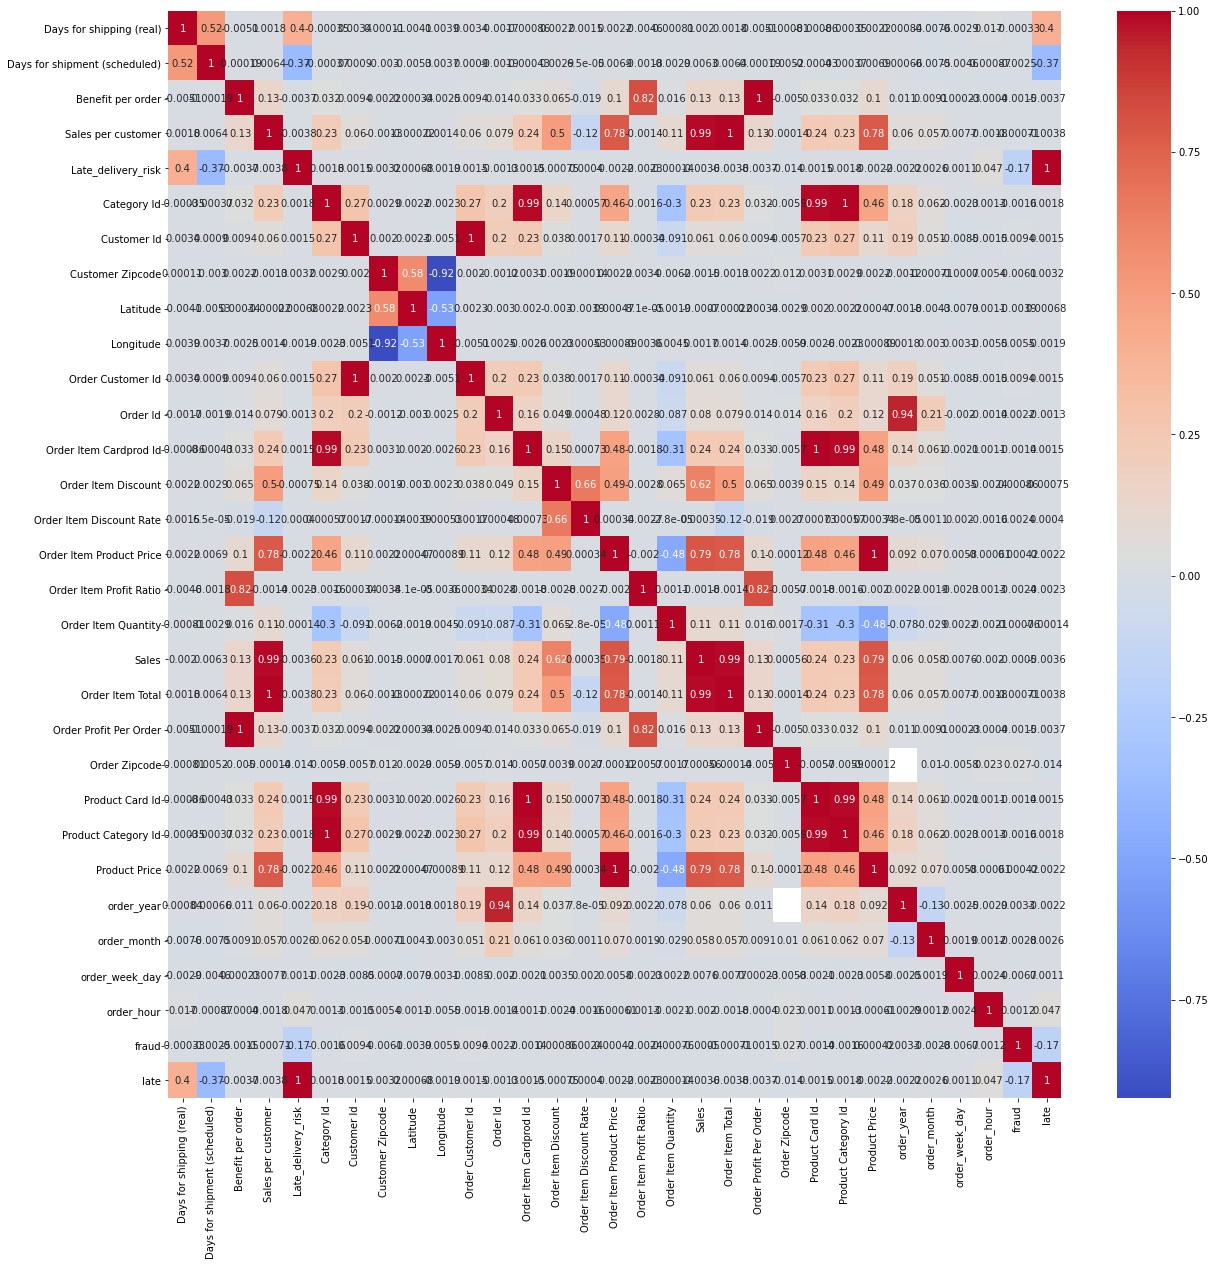

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [28]:
train_data.drop(['Order Customer Id', 'Order Item Cardprod Id', 'Order Item Total', 'Order Profit Per Order', \
           'Product Card Id', 'Product Category Id', 'Product Price', 'Sales per customer', 'Late_delivery_risk'], axis=1, inplace = True)
len(train_data.columns)

42

#### 根据特征具体含义进一步筛选

In [29]:
import pandas as pd
pd.set_option('display.max_columns', None)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,Customer Name,order_year,order_month,order_week_day,order_hour,order_month_year,fraud,late
0,DEBIT,3,4,91.250000,Advance shipping,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,327.750000,0.29,1,327.750000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,2/3/2018 22:56,Standard Class,Cally Holloway,2018,1,2,22,2018-01,0,0
1,TRANSFER,5,4,-249.089996,Late delivery,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,South Asia,Rajastán,PENDING,Smart watch,1/18/2018 12:27,Standard Class,Irene Luna,2018,1,5,12,2018-01,0,1
2,CASH,4,4,-247.779999,Shipping on time,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,South Asia,Rajastán,CLOSED,Smart watch,1/17/2018 12:06,Standard Class,Gillian Maldonado,2018,1,5,12,2018-01,0,0
3,DEBIT,3,4,22.860001,Advance shipping,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,75937,22.940001,0.07,327.750000,0.08,1,327.750000,Oceania,Queensland,COMPLETE,Smart watch,1/16/2018 11:45,Standard Class,Tana Tate,2018,1,5,11,2018-01,0,0
4,PAYMENT,2,4,134.210007,Advance shipping,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,75936,29.500000,0.09,327.750000,0.45,1,327.750000,Oceania,Queensland,PENDING_PAYMENT,Smart watch,1/15/2018 11:24,Standard Class,Orli Hendricks,2018,1,5,11,2018-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,Shipping on time,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,NY,1322 Broad Glade,11207.0,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,2016-01-16 03:40:00,26043,0.000000,0.00,399.980011,0.10,1,399.980011,Eastern Asia,Shanghái,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class,Maria Peterson,2016,1,5,3,2016-01,0,0
180515,DEBIT,3,2,-613.770019,Late delivery,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,CA,7330 Broad Apple Moor,93304.0,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,2016-01-16 01:34:00,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,Eastern Asia,Osaka,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class,Ronald Clark,2016,1,5,1,2016-01,0,1
180516,TRANSFER,5,4,141.110001,Late delivery,45,Fishing,Bristol,EE. UU.,291,Corporate,CT,97 Burning Landing,6010.0,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,2016-01-15 21:00:00,26024,8.000000,0.02,399.980011,0.36,1,399.980011,Oceania,Australia del Sur,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class,John Smith,2016,1,4,21,2016-01,0,1
180517,PAYMENT,3,4,186.229996,Advance shipping,45,Fishing,Caguas,Puerto Rico,2813,Consumer,PR,2585 Silent Autumn Landing,725.0,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,2016-01-15 20:18:00,260

In [30]:
train_data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Delivery Status                  0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Region        

In [13]:
# Order Zipcode缺失较多，选择去掉
# 由于已经提取过年月日，可去掉order原始时间字段，而shipping date已经在Days for shipping中反映，同样可以去掉
# 由于有地区信息，经纬度、街道等过于细节的内容意义不大，可以去掉
train_data.drop(['Order Zipcode', 'order date (DateOrders)', 'shipping date (DateOrders)', 'order_month_year', 'Latitude', 'Longitude', 'Customer Street'], axis=1, inplace = True)
len(train_data.columns)

36

In [16]:
# 可根据与预测目标相关性进一步精简特征
# train_data.corr()['fraud']

#### 数据预处理

In [14]:
# 查看分类类型
cat_cols = train_data.select_dtypes(include='object').columns
cat_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Product Name',
       'Shipping Mode', 'Customer Name'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat in cat_cols:
    train_data[cat] = le.fit_transform(train_data[cat])
train_data[cat_cols]

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Customer Name
0,1,0,40,66,1,0,36,4,3,331,70,15,475,2,78,3,1876
1,3,1,40,66,1,0,36,4,3,391,69,13,841,5,78,3,5378
2,0,3,40,452,0,0,5,4,3,391,69,13,841,1,78,3,4429
3,1,0,40,285,0,2,5,4,3,3226,8,11,835,2,78,3,12929
4,2,0,40,66,1,1,36,4,3,3226,8,11,835,6,78,3,10638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,3,18,59,0,2,31,3,3,2922,31,7,913,1,24,3,8426
180515,1,1,18,26,0,1,5,3,3,1362,77,7,770,2,24,2,11679
180516,3,1,18,55,0,1,7,3,3,25,8,11,88,5,24,3,6300
180517,2,0,18,66,1,0,36,3,3,25,8,11,88,6,24,3,9384


In [21]:
f_x = train_data.drop(['fraud', 'Order Status'], axis=1)
f_y = train_data['fraud']
l_x = train_data.drop(['late', 'Delivery Status', 'Days for shipping (real)'], axis=1) # 谨防标签泄露
l_y = train_data['late']
s_x = train_data.drop(['Sales', 'Order Item Product Price'], axis=1)
s_y = train_data['Sales']
q_x = train_data.drop(['Order Item Quantity', 'Order Item Product Price'], axis=1)
q_y = train_data['Order Item Quantity']

In [22]:
# 数据集切分
from sklearn.model_selection import train_test_split
f_x_train, f_x_test, f_y_train, f_y_test = train_test_split(f_x, f_y, test_size=0.2)
l_x_train, l_x_test, l_y_train, l_y_test = train_test_split(l_x, l_y, test_size=0.2)
s_x_train, s_x_test, s_y_train, s_y_test = train_test_split(s_x, s_y, test_size=0.2)
q_x_train, q_x_test, q_y_train, q_y_test = train_test_split(q_x, q_y, test_size=0.2)

In [23]:
from sklearn.preprocessing import StandardScaler
# 数据规范化
ss = StandardScaler()
f_x_train = ss.fit_transform(f_x_train)
f_x_test = ss.transform(f_x_test)

l_x_train = ss.fit_transform(l_x_train)
l_x_test = ss.transform(l_x_test)

s_x_train = ss.fit_transform(s_x_train)
s_x_test = ss.transform(s_x_test)

q_x_train = ss.fit_transform(q_x_train)
q_x_test = ss.transform(q_x_test)

#### 分类任务

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
def c_model_stats(model, x_train, y_train, x_test, y_test, name='Fraud'):
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    auc = roc_auc_score(y_pred, y_test)
    confusion = confusion_matrix(y_pred, y_test)
    print('Mission:', name)
    print('Model:', model)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print('AUC:', auc)
    print('Confusion_matrix', confusion)
#     return accuracy, recall, f1
    return model

##### 逻辑回归

In [31]:
from sklearn.linear_model import LogisticRegression
# 逻辑回归模型
f_model = LogisticRegression()
l_model = LogisticRegression()

f_model = c_model_stats(f_model, f_x_train, f_y_train, f_x_test, f_y_test)
l_model = c_model_stats(l_model, l_x_train, l_y_train, l_x_test, l_y_test, name = 'Late Delivery')

Mission: Fraud
Model: LogisticRegression()
Accuracy: 0.9795590516286284
Precision: 0.2198952879581152
Recall: 0.5419354838709678
F1: 0.3128491620111732
AUC: 0.7626423242677184
Confusion_matrix [[35198   596]
 [  142   168]]
Mission: Late Delivery
Model: LogisticRegression()
Accuracy: 0.6826944382893863
Precision: 0.6194299070169199
Recall: 0.7545336386705452
F1: 0.6803393046486969
AUC: 0.6895192883782366
Confusion_matrix [[12457  7490]
 [ 3966 12191]]


##### 决策树

In [32]:
from sklearn.tree import DecisionTreeClassifier
# 决策树模型
f_model = DecisionTreeClassifier()
l_model = DecisionTreeClassifier()

f_model = c_model_stats(f_model, f_x_train, f_y_train, f_x_test, f_y_test)
l_model = c_model_stats(l_model, l_x_train, l_y_train, l_x_test, l_y_test, name = 'Late Delivery')

Mission: Fraud
Model: DecisionTreeClassifier()
Accuracy: 0.9939895856414802
Precision: 0.8651832460732984
Recall: 0.8529032258064516
F1: 0.8589993502274205
AUC: 0.924993886955704
Confusion_matrix [[35226   103]
 [  114   661]]
Mission: Late Delivery
Model: DecisionTreeClassifier()
Accuracy: 0.9056337247950366
Precision: 0.915146588079874
Recall: 0.9120417257443791
F1: 0.9135915189327651
AUC: 0.9049692610135444
Confusion_matrix [[14686  1670]
 [ 1737 18011]]


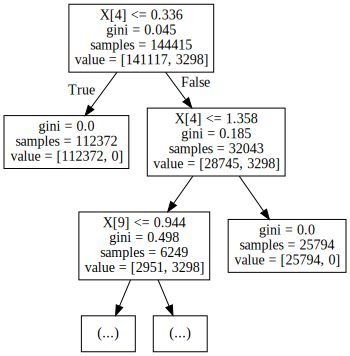

In [51]:
# 以欺诈为例，尝试分析可解释性
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(f_model, out_file=None, max_depth=2) 
graph = graphviz.Source(dot_data) 
graph

In [44]:
train_data[train_data['Delivery Status'] == 0]['fraud'].value_counts()

0    41592
Name: fraud, dtype: int64

In [48]:
train_data[train_data['Delivery Status'] == 1]['fraud'].value_counts()

0    98977
Name: fraud, dtype: int64

In [45]:
train_data['Delivery Status'].value_counts()

1    98977
0    41592
3    32196
2     7754
Name: Delivery Status, dtype: int64

In [46]:
data['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

说明提前运送或者迟送的订单大概率都不是欺诈订单，可能是因为提前送达使得用户很难实施欺诈，而迟送却没有被取消可能说明用户对商品本身有一定的执着性，用户抱有欺诈意图的概率更小。

#### 回归任务

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def r_model_stats(model, x_train, y_train, x_test, y_test, name='Sales'):
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    print('Mission:', name)
    print('Model:', model)
    print('MAE:', mae)
    print('MSE:', mse)
#     return mae, mse
    return model

##### 决策树

In [28]:
from sklearn.tree import DecisionTreeRegressor
s_model = DecisionTreeRegressor()
q_model = DecisionTreeRegressor()

s_model = r_model_stats(s_model, s_x_train, s_y_train, s_x_test, s_y_test)
q_model = r_model_stats(q_model, q_x_train, q_y_train, q_x_test, q_y_test, name='Quantity')

Mission: Sales
Model: DecisionTreeRegressor()
MAE: 0.18260995851426903
MSE: 61.13902861437687
Mission: Quantity
Model: DecisionTreeRegressor()
MAE: 0.00024927985818745847
MSE: 0.0005262574783957456


##### XGBoost

In [52]:
import xgboost as xgb
s_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=7)
q_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=7)

s_model = r_model_stats(s_model, s_x_train, s_y_train, s_x_test, s_y_test)
q_model = r_model_stats(q_model, q_x_train, q_y_train, q_x_test, q_y_test, name='Quantity')

Mission: Sales
Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
MAE: 0.9191429800881186
MSE: 35.44985024175246
Mission: Quantity
Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()'

In [59]:
# 以销量为例，尝试分析可解释性
importance = q_model.feature_importances_

In [64]:
np.where(importance>1e-1,importance,0)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.3096345 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.24688165, 0.        , 0.        , 0.        ,
       0.30797258, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

In [58]:
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Name,Shipping Mode,Customer Name,order_year,order_month,order_week_day,order_hour,fraud,late
0,1,3,4,91.250000,0,73,40,66,1,20755,0,36,725.0,4,3,331,70,77202,13.110000,0.04,327.750000,0.29,1,327.750000,15,475,2,78,3,1876,2018,1,2,22,0,0
1,3,5,4,-249.089996,1,73,40,66,1,19492,0,36,725.0,4,3,391,69,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,13,841,5,78,3,5378,2018,1,5,12,0,1
2,0,4,4,-247.779999,3,73,40,452,0,19491,0,5,95125.0,4,3,391,69,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,13,841,1,78,3,4429,2018,1,5,12,0,0
3,1,3,4,22.860001,0,73,40,285,0,19490,2,5,90027.0,4,3,3226,8,75937,22.940001,0.07,327.750000,0.08,1,327.750000,11,835,2,78,3,12929,2018,1,5,11,0,0
4,2,2,4,134.210007,0,73,40,66,1,19489,1,36,725.0,4,3,3226,8,75936,29.500000,0.09,327.750000,0.45,1,327.750000,11,835,6,78,3,10638,2018,1,5,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,3,45,18,59,0,1005,2,31,11207.0,3,3,2922,31,26043,0.000000,0.00,399.980011,0.10,1,399.980011,7,913,1,24,3,8426,2016,1,5,3,0,0
180515,1,3,2,-613.770019,1,45,18,26,0,9141,1,5,93304.0,3,3,1362,77,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,7,770,2,24,2,11679,2016,1,5,1,0,1
180516,3,5,4,141.110001,1,45,18,55,0,291,1,7,6010.0,3,3,25,8,26024,8.000000,0.02,399.980011,0.36,1,399.980011,11,88,5,24,3,6300,2016,1,4,21,0,1
180517,2,3,4,186.229996,0,45,18,66,1,2813,0,36,725.0,3,3,25,8,26022,12.000000,0.03,399.980011,0.48,1,399.980011,11,88,6,24,3,9384,2016,1,4,20,0,0


模型以Department Name（商店的专区名称，如Fitness, Golf, Footwear...）, Order Item Profit Ratio（订单商品的利润率）, Product Name（商品名称）作为影响销量的主要因素。